In [1]:
import numpy as np
import pandas as pd

In [2]:
import glob
import time

In [3]:
from nltk import ngrams
from nltk.tokenize import sent_tokenize
import nltk
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('wordnet')
from nltk.stem import PorterStemmer
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

In [4]:
df = pd.read_csv("sqliv2.csv",encoding='utf-16')

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df=2, max_df=0.7, stop_words=stopwords.words('english'))
posts = vectorizer.fit_transform(df['Sentence'].values.astype('U')).toarray()

In [6]:
transformed_posts=pd.DataFrame(posts)

In [7]:
df=pd.concat([df,transformed_posts],axis=1)

In [8]:
X = df[df.columns[2:]]

In [9]:
y = df['Label']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,10311,10312,10313,10314,10315,10316,10317,10318,10319,10320
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
from keras.wrappers.scikit_learn import KerasClassifier

In [14]:
input_dim = X_train.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(20, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(10,  activation='tanh'))
model.add(layers.Dense(1024, activation='relu'))

model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [15]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                206440    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              11264     
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 1025      
Total params: 223,035
Trainable params: 220,987
Non-trainable params: 2,048
______________________________________________

In [16]:
from sklearn.ensemble import RandomForestClassifier
randfor = RandomForestClassifier(n_estimators = 500)
randfor.fit(X_train, y_train)

pred_randfor = randfor.predict(X_test)

In [17]:
def accuracy_function(tp,tn,fp,fn):
    
    accuracy = (tp+tn) / (tp+tn+fp+fn)
    
    return accuracy

def precision_function(tp,fp):
    
    precision = tp / (tp+fp)
    
    return precision

def recall_function(tp,fn):
    
    recall=tp / (tp+fn)
    
    return recall

def confusion_matrix(truth,predicted):
    
    true_positive = 0
    true_negative = 0
    false_positive = 0
    false_negative = 0
    for true,pred in zip(truth,predicted):
        
        if true == 1:
            if pred == true:
                true_positive += 1
            elif pred != true:
                false_negative += 1

        elif true == 0:
            if pred == true:
                true_negative += 1
            elif pred != true:
                false_positive += 1
            
    accuracy = accuracy_function(true_positive, true_negative, false_positive, false_negative)
    precision = precision_function(true_positive, false_positive)
    recall = recall_function(true_positive, false_negative)
    print(" Confusion Matrix : \n tp : {0} \n tn : {1} \n fp: {2} \n fn : {3} ". format(true_positive, true_negative, false_positive, false_negative))
    
    return (accuracy,precision,recall)

In [18]:
accuracy,precision,recall=confusion_matrix(y_test,pred_randfor)
print(" For Random Forest Accuracy : {0} \n Precision : {1} \n Recall : {2}".format(accuracy, precision, recall))

 Confusion Matrix : 
 tp : 2040 
 tn : 4423 
 fp: 36 
 fn : 254 
 For Random Forest Accuracy : 0.9570561232045017 
 Precision : 0.9826589595375722 
 Recall : 0.8892763731473409


In [19]:
df.head()

,Sentence,Label,0,1,2,3,4,5,6,7,...,10311,10312,10313,10314,10315,10316,10317,10318,10319,10320
0,NaN,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,""" or pg_sleep ( __TIME__ ) --",1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,create user name identified by pass123 tempora...,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,%29,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,' AND 1 = utl_inaddr.get_host_address ( ( S...,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
X.shape

(33761, 10321)

In [21]:
X_list = list(X.columns)

In [22]:
randfor.score(X_test, y_test)

0.9570561232045017

In [23]:
F1 = (2 * recall * precision) / (recall + precision)

In [24]:
print(" For Random Forest Accuracy : {0} \n Precision : {1} \n Recall : {2} \n F1 Score : {3}".format(accuracy, precision, recall, F1))

 For Random Forest Accuracy : 0.9570561232045017 
 Precision : 0.9826589595375722 
 Recall : 0.8892763731473409 
 F1 Score : 0.9336384439359268


In [25]:
#estimator = randfor.estimators_[5]

#from sklearn.tree import export_graphviz

#export_graphviz(estimator, out_file='tree.dot',
#                feature_names = X_list,
#                rounded = True, proportion = False,
#                precision = 1, filled = True)



In [26]:
#import pydot

#(graph,) = pydot.graph_from_dot_file('tree.dot')
#graph.write_png('treepng.png')

In [27]:
from sklearn import tree

dt = tree.DecisionTreeClassifier()
dt = dt.fit(X_train, y_train)

pred_dt = dt.predict(X_test)

In [28]:
accuracy,precision,recall=confusion_matrix(y_test,pred_dt)
print(" For Decision Tree Accuracy : {0} \n Precision : {1} \n Recall : {2} \n F1 Score : {3}".format(accuracy, precision, recall, F1))
F1 = (2 * recall * precision) / (recall + precision)


 Confusion Matrix : 
 tp : 2054 
 tn : 4401 
 fp: 58 
 fn : 240 
 For Decision Tree Accuracy : 0.9558714645342811 
 Precision : 0.9725378787878788 
 Recall : 0.8953792502179599 
 F1 Score : 0.9336384439359268


<ipython-input-29-0420e54bb9d4>:12: UserWarning: Legend does not support '0' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend("0","1")


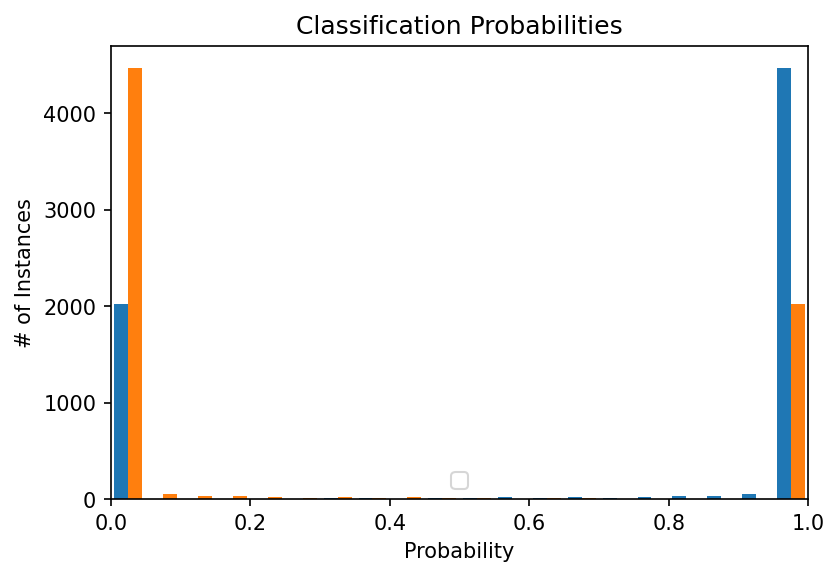

In [29]:
import matplotlib.pyplot as plt

# get the probability distribution
probas = randfor.predict_proba(X_test)
# plot
plt.figure(dpi=150)
plt.hist(probas, bins=20)
plt.title('Classification Probabilities')
plt.xlabel('Probability')
plt.ylabel('# of Instances')
plt.xlim([0, 1])
plt.legend("0","1")
plt.show()

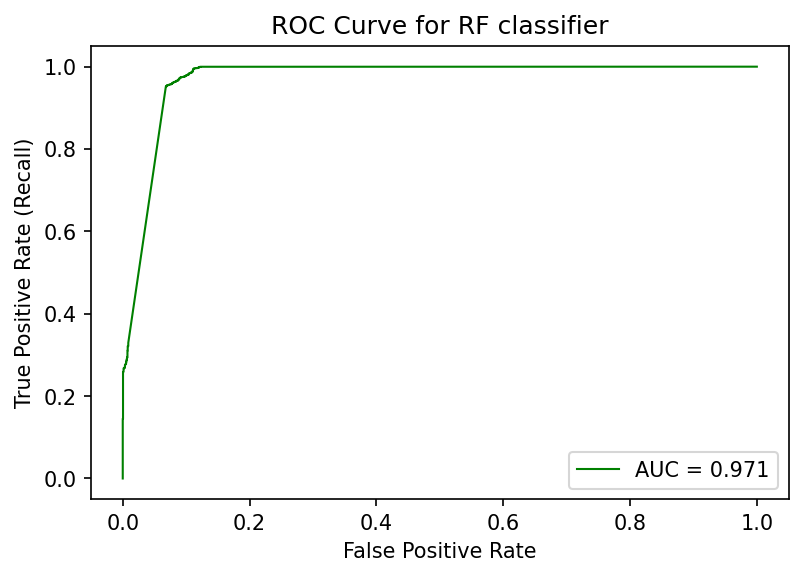

In [30]:
from sklearn.metrics import roc_curve, auc
# get false and true positive rates
fpr, tpr, thresholds = roc_curve(y_test, probas[:,0], pos_label=0)
# get area under the curve
roc_auc = auc(fpr, tpr)
# PLOT ROC curve
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='green', label=f'AUC = {roc_auc:.3f}')
plt.title('ROC Curve for RF classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()

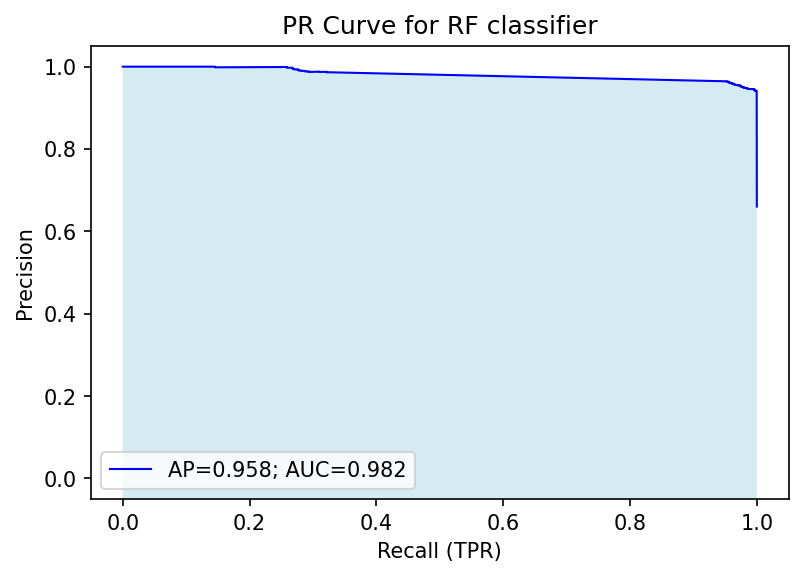

In [31]:
from sklearn.metrics import precision_recall_curve, average_precision_score, auc
# get precision and recall values
precision, recall, thresholds = precision_recall_curve(y_test, probas[:,0], pos_label=0)
# average precision score
avg_precision = average_precision_score(y_test, probas[:,1])
# precision auc
pr_auc = auc(recall, precision)
# plot
plt.figure(dpi=150)
plt.plot(recall, precision, lw=1, color='blue', label=f'AP={avg_precision:.3f}; AUC={pr_auc:.3f}')
plt.fill_between(recall, precision, -1, facecolor='lightblue', alpha=0.5)
plt.title('PR Curve for RF classifier')
plt.xlabel('Recall (TPR)')
plt.ylabel('Precision')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()